In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
from sklearn import svm
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

In [2]:
# NOTE: change destination folder of dataset to suit.
sentiment140_data = pd.read_csv("Downloads/training.1600000.processed.noemoticon.csv", 
                                encoding="ISO-8859-1", header=None, names=["target","id","date","flag","user","text"])

In [3]:
sentiment140_data

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
data = sentiment140_data.drop(["id","date","flag","user"], axis=1)

In [5]:
data

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
data["target"] = data["target"].replace(4, 1)

In [7]:
data

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


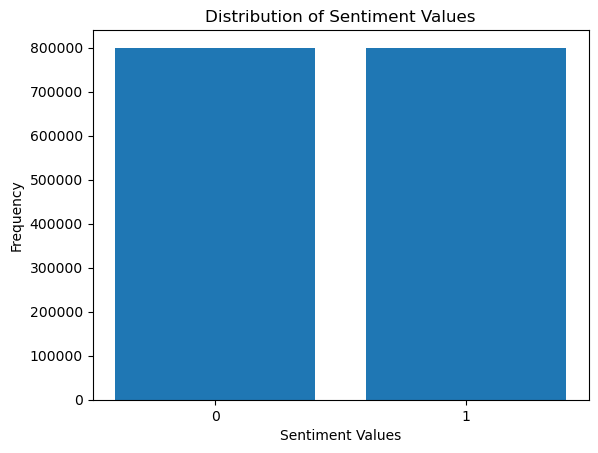

In [8]:
# Bar chart to check for data imbalance.
value_counts = data["target"].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Sentiment Values")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Values")
plt.xticks(value_counts.index)
plt.show()

In [9]:
nltk.download('stopwords', quiet=True)


True

In [10]:
# TODO: handle emojis if time
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
TEXT_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [11]:
def preprocess(text, stem=False):
    text = re.sub(TEXT_RE, " ", str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [12]:
data["text"] = data["text"].apply(lambda x: preprocess(x))
data.head()

,target,text
0,0,awww bummer shoulda got david carr third day
1,0,upset update facebook texting might cry result...
2,0,dived many times ball managed save 50 rest go ...
3,0,whole body feels itchy like fire
4,0,behaving mad see


In [13]:
TRAIN_SIZE = 0.7
X = data["text"]
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-TRAIN_SIZE, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119999,)
(480001,)
(1119999,)
(480001,)


In [15]:
X.head()


0         awww bummer shoulda got david carr third day
1    upset update facebook texting might cry result...
2    dived many times ball managed save 50 rest go ...
3                     whole body feels itchy like fire
4                                     behaving mad see
Name: text, dtype: object

In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [17]:
import random
data_target_0 = data[data['target'] == 0]
data_target_1 = data[data['target'] == 1]
random.seed(42)  # Set a random seed for reproducibility
sample_size = 40000  # Half of the desired sample size (500 / 2)

# Randomly sample from target = 0
sampled_data_target_0 = data_target_0.sample(n=sample_size)

# Randomly sample from target = 1
sampled_data_target_1 = data_target_1.sample(n=sample_size)

# Concatenate the two sampled DataFrames to get the final sample
final_sample = pd.concat([sampled_data_target_0, sampled_data_target_1])

# Shuffle the final sample to ensure randomness
final_sample = final_sample.sample(frac=1).reset_index(drop=True)


In [18]:
final_sample

,target,text
0,0,finally found problem jrails set accept header...
1,0,want make
2,1,sooo cute
3,0,love twitter flowers increse
4,0,sittin home hoping job call back
...,...,...
79995,0,lt 3 nice day pool shame raining cats amp dogs
79996,0,lost please help find good home
79997,1,clocked little bit getting avg 30 fps gta4 pla...
79998,1,found raport


In [19]:
NGRAM_RANGE = (1,2)
#MAX_FEATURES = 50000
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf= vectorizer.fit_transform(final_sample.text)
X_train, X_test, Y_train, Y_test = train_test_split(X_tf_idf, final_sample['target'], random_state=42)

In [20]:
import seaborn as sns
import re, nltk
nltk.download('punkt')
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

from sklearn.model_selection import cross_val_score


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\low19\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\low19\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def check_scores(clf,X_train, X_test, y_train, y_test):

  model=clf.fit(X_train, y_train)
  predicted_class=model.predict(X_test)
  predicted_class_train=model.predict(X_train)
  test_probs = model.predict_proba(X_test)
  test_probs = test_probs[:, 1]
  yhat = model.predict(X_test)
  lr_precision, lr_recall, _ = precision_recall_curve(y_test, test_probs)
  lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)


  print('Train confusion matrix is: ',)
  print(confusion_matrix(y_train, predicted_class_train))

  print()
  print('Test confusion matrix is: ')
  print(confusion_matrix(y_test, predicted_class))
  print()
  print(classification_report(y_test,predicted_class)) 
  print() 
  train_accuracy = accuracy_score(y_train,predicted_class_train)
  test_accuracy = accuracy_score(y_test,predicted_class)

  print("Train accuracy score: ", train_accuracy)
  print("Test accuracy score: ",test_accuracy )
  print()
  train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
  test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

  print("Train ROC-AUC score: ", train_auc)
  print("Test ROC-AUC score: ", test_auc)
  fig, (ax1, ax2) = plt.subplots(1, 2)

  ax1.plot(lr_recall, lr_precision)
  ax1.set(xlabel="Recall", ylabel="Precision")

  plt.subplots_adjust(left=0.5,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
  print()
  print('Are under Precision-Recall curve:', lr_f1)
  
  fpr, tpr, _ = roc_curve(y_test, test_probs)


  ax2.plot(fpr, tpr)
  ax2.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

  print("Area under ROC-AUC:", lr_auc)
  return train_accuracy, test_accuracy, train_auc, test_auc

def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid 
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return optimal_model


In [22]:
SVM = svm.SVC(probability=True)

Train confusion matrix is: 
[[28599  1407]
 [ 1570 28424]]

Test confusion matrix is: 
[[7334 2660]
 [2175 7831]]

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      9994
           1       0.75      0.78      0.76     10006

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.76      0.76      0.76     20000


Train accuracy score:  0.9503833333333334
Test accuracy score:  0.75825

Train ROC-AUC score:  0.9825929854148304
Test ROC-AUC score:  0.83303199989152

Are under Precision-Recall curve: 0.7641118212421331
Area under ROC-AUC: 0.8295255451264759


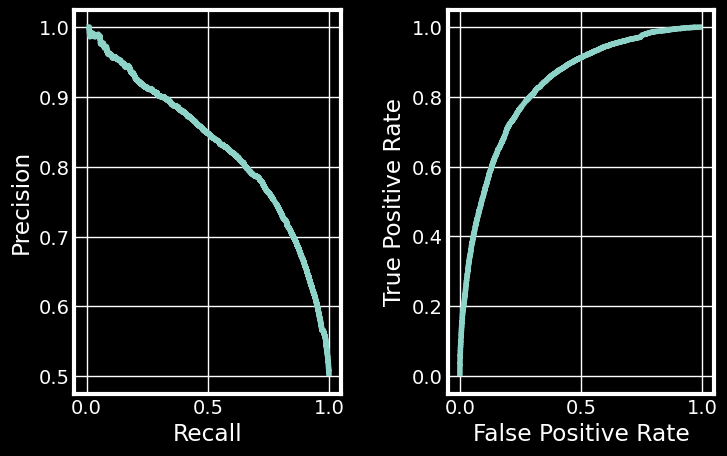

In [32]:

s_train_accuracy, s_test_accuracy, s_train_auc, s_test_auc = check_scores(SVM,X_train, X_test, Y_train, Y_test)

In [23]:
# Tuning the hyperparameters
parameters ={
    "C":[0.1,1,10],
    "kernel":['linear', 'rbf', 'sigmoid'],
    "gamma":['scale', 'auto']
}



svm_optimal = grid_search(svm.SVC(probability=True), parameters,X_train, Y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 7.2min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 7.0min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 8.4min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 8.4min
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time= 7.5min
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time= 7.4min
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time= 7.1min
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time= 7.1min
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 9.2min
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 8.8min
[CV] END ..................C=0.1, gamma=auto, kernel=sigmoid; total time= 8.5min
[CV] END ..................C=0.1, gamma=auto, ke

Train confusion matrix is: 
[[28326  1576]
 [ 1398 28700]]

Test confusion matrix is: 
[[7368 2730]
 [2092 7810]]

              precision    recall  f1-score   support

           0       0.78      0.73      0.75     10098
           1       0.74      0.79      0.76      9902

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.76      0.76      0.76     20000


Train accuracy score:  0.9504333333333334
Test accuracy score:  0.7589

Train ROC-AUC score:  0.9832850166325553
Test ROC-AUC score:  0.8396485798496088

Are under Precision-Recall curve: 0.7641131004794051
Area under ROC-AUC: 0.8304619971644897


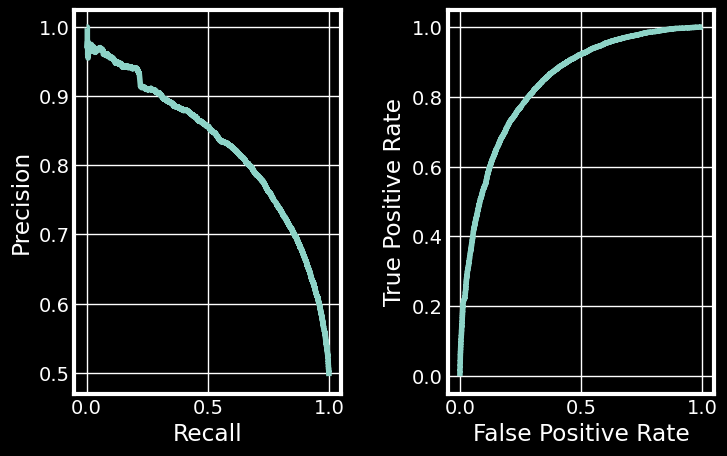

In [24]:
s_train_accuracy, s_test_accuracy, s_train_auc, s_test_auc = check_scores(svm_optimal,X_train, X_test, Y_train, Y_test)